In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [8]:
# '围网', '拖网', '刺网'

In [13]:
type_dict = {'围网':'wei','拖网':'tuo','刺网':'ci'}

In [14]:
# train = pd.read_hdf('./output/train.h5')
train = pd.read_hdf('./output/train.h5')

In [15]:
t = train[train['ship']==2963]

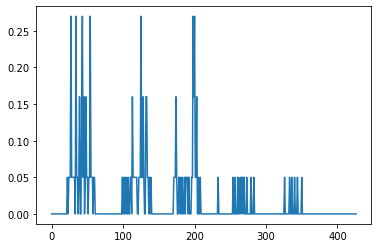

In [16]:
plt.plot(t['v'])

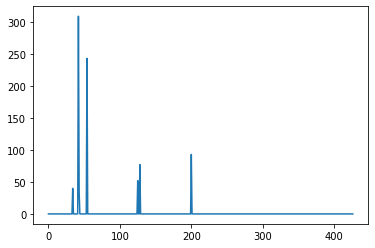

In [17]:
plt.plot(t['d'])

In [18]:
def show_path(type_name):
    ids = train[train['type']==type_name]['ship'].unique()
    ids = [ids[np.random.randint(len(ids))] for x in range(10)]
    t = train[train['ship'].isin(ids)]

    f, ax = plt.subplots(5,2, figsize=(8,20))
    for index, cur_id in enumerate(ids):
        cur = t[t['ship']==cur_id]
        i = index//2
        j = index % 2
        ax[i,j].plot(cur['x'], cur['y'])
#         if i==0 and j==0:
        ax[i,j].set_title(cur_id)

In [19]:
train[train['ship']==2963]

,ship,x,y,v,d,time,type
0,2963,6.315982e+06,5.291346e+06,0.0,0,1120 23:57:26,围网
1,2963,6.315982e+06,5.291346e+06,0.0,0,1120 23:47:26,围网
2,2963,6.315982e+06,5.291346e+06,0.0,0,1120 23:37:26,围网
3,2963,6.315982e+06,5.291346e+06,0.0,0,1120 23:27:26,围网
4,2963,6.315982e+06,5.291346e+06,0.0,0,1120 23:17:26,围网
...,...,...,...,...,...,...,...
422,2963,6.315982e+06,5.291346e+06,0.0,0,1118 00:47:43,围网
423,2963,6.315982e+06,5.291346e+06,0.0,0,1118 00:37:43,围网
424,2963,6.315982e+06,5.291346e+06,0.0,0,1118 00:27:43,围网
425,2963,6.315982e+06,5.291346e+06,0.0,0,1118 00:17:43,围网


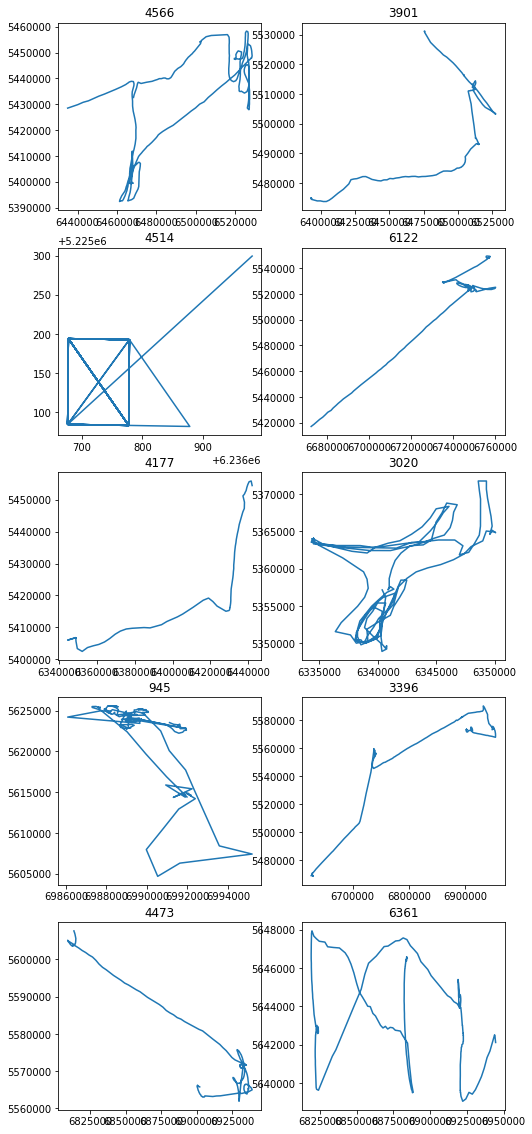

In [20]:
show_path('围网')

In [21]:
train[train['ship']==4022]

,ship,x,y,v,d,time,type
0,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:55:45,拖网
1,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:45:45,拖网
2,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:35:45,拖网
3,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:25:45,拖网
4,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:15:45,拖网
...,...,...,...,...,...,...,...
416,4022,6.102550e+06,5.112648e+06,0.05,0,1118 00:46:00,拖网
417,4022,6.102550e+06,5.112648e+06,0.00,0,1118 00:36:00,拖网
418,4022,6.102550e+06,5.112648e+06,0.00,0,1118 00:26:00,拖网
419,4022,6.102550e+06,5.112648e+06,0.00,0,1118 00:16:00,拖网


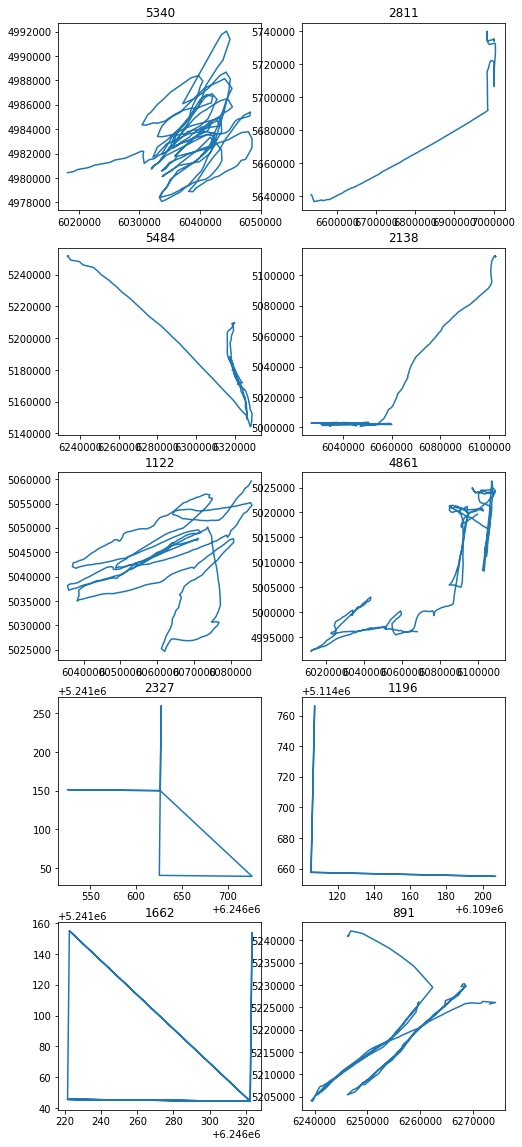

In [22]:

show_path('拖网')

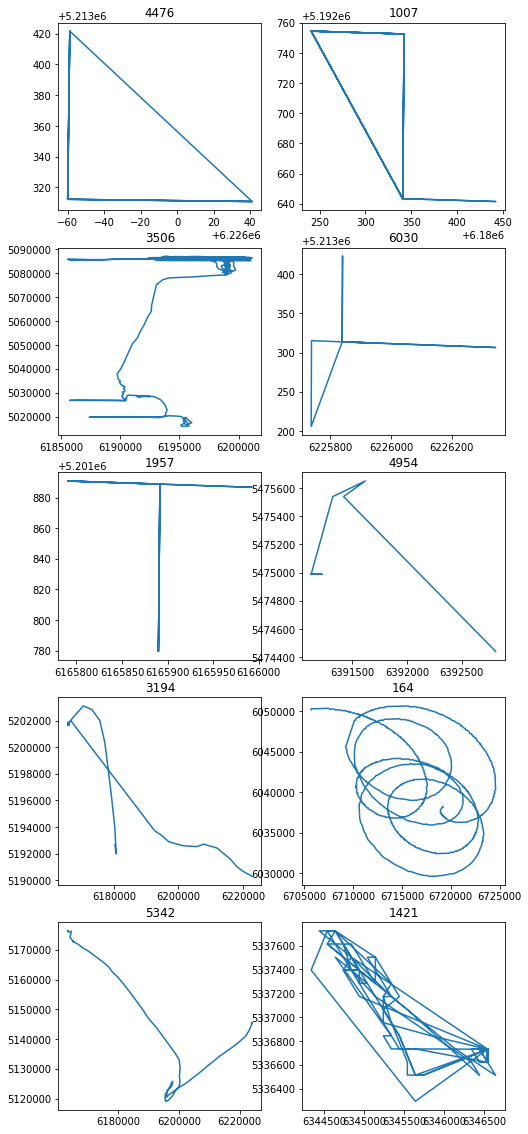

In [23]:
show_path('刺网')

In [24]:
train[train['ship']==1415]

,ship,x,y,v,d,time,type
0,1415,6.346640e+06,5.336511e+06,0.22,102,1110 11:54:35,刺网
1,1415,6.346640e+06,5.336511e+06,0.11,0,1110 11:44:35,刺网
2,1415,6.346640e+06,5.336511e+06,0.11,0,1110 11:34:35,刺网
3,1415,6.345538e+06,5.336624e+06,2.70,5,1110 11:24:33,刺网
4,1415,6.345538e+06,5.336514e+06,0.49,0,1110 11:14:32,刺网
...,...,...,...,...,...,...,...
396,1415,6.346541e+06,5.336731e+06,0.32,0,1107 12:49:44,刺网
397,1415,6.346541e+06,5.336731e+06,0.32,0,1107 12:39:43,刺网
398,1415,6.346541e+06,5.336731e+06,0.11,0,1107 12:29:46,刺网
399,1415,6.346541e+06,5.336731e+06,0.22,0,1107 12:19:46,刺网
